In [ ]:
#from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pickle

In D:\Users\207634\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\207634\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\207634\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\207634\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

## Loading data, training a model

In [216]:
file1 = 'Flight-Level-False-Pos-Data_161020.csv'

df1 = pd.read_csv(file1)
df1 = df1.set_index('p14_event_record')

#df1.head()

,flight_record,flight_date_exact,tail_number,airframe,fleet,takeoff_airport_code,landing_airport_code,p14_event_type,p14_severity,p14_false_positive,...,p14_duration_of_event_seconds,p14_terrain_elevation_at_start_of_event_ft,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,p14_speed_brake_handle_position_at_start_of_event_deg,p14_flap_position_at_start_of_event_deg_ted,target
p14_event_record,,,,,,,,,,,,,,,,,,,,,
40633888,2723451,27/09/2019 10:49,VH-VYL,737-800,QFA - 737-800 (1024 wps),YSSY,YMML,Pitch Rate Low during Rotation,Level 2,Not a False Positive,...,4.0,9.010899,0.0,-0.001710,0.008187,0,5.0,-0.642574,5.203770,0
40633447,2724222,28/09/2019 6:40,VH-VYJ,737-800,QFA - 737-800 (1024 wps),YMML,YBBN,Airborne Speed High,Level 2,Not a False Positive,...,0.0,364.491119,2.0,0.001335,0.004570,0,5.0,-0.826390,5.227524,0
40633090,2724792,29/09/2019 4:54,VH-VZP,737-800,QFA - 737-800 (1024 wps),YPPH,YSSY,Pitch Rate Low during Rotation,Level 2,Not a False Positive,...,4.0,51.457150,2.0,-0.000326,0.022439,0,15.0,-1.654518,15.058637,0
40632151,2726347,30/09/2019 2:38,VH-VZM,737-800,QFA - 737-800 (1024 wps),YSCB,YMML,Rotation Speed High,Level 2,Not a False Positive,...,0.0,1863.713501,0.0,-0.000095,0.676774,0,5.0,-0.458835,4.965484,0
40631563,2726828,30/09/2019 21:03,VH-VXE,737-800,QFA - 737-800 (1024 wps),YMML,YPAD,Pitch Rate Low during Rotation,Level 2,Not a False Positive,...,4.0,6.607008,0.0,241.124381,0.171292,0,5.0,-0.458835,4.965484,0


## EDA

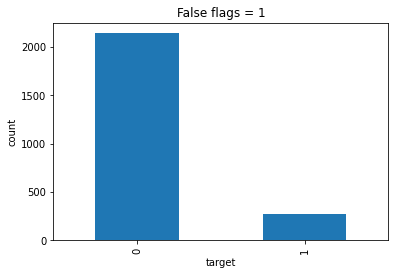

0    2143
1     276
Name: target, dtype: int64

In [4]:
df1['target'].value_counts().plot.bar()

plt.xlabel('target')
plt.ylabel('count')
plt.title('False flags = 1')
plt.show()

df1['target'].value_counts()

## setting features and targets

In [5]:
#df1.columns.tolist()

In [6]:
features = ['flight_record',
 'flight_date_exact',
 'tail_number',
 'airframe',
 'fleet',
 'takeoff_airport_code',
 'landing_airport_code',
 'p14_event_type',
 'p14_severity',
 'p14_false_positive',
 'p14_start_of_event_10_seconds_seconds_from_start_of_file',
 'p14_end_of_event_10_seconds_seconds_from_start_of_file',
 'p14_duration_of_event_seconds',
 'p14_terrain_elevation_at_start_of_event_ft',
 'p14_data_dropouts_seconds',
 'p14_error_b_w_gmt_and_recorded_time_around_event_percent',
 'p14_estimated_nav_error_at_start_of_event_nm',
 'p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz',
 'p14_flap_handle_position_at_start_of_event',
 'p14_speed_brake_handle_position_at_start_of_event_deg',
 'p14_flap_position_at_start_of_event_deg_ted'
           ]

target = 'target'

In [7]:
X = df1[features]
y = df1[target]

## train test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
X_train.shape

(1693, 21)

In [10]:
X_test.shape

(726, 21)

## functions for processing data

In [11]:
def process_severity(df):
    """convert severity level Column into integers 

    Usage
    ------

    train = process_severity(train)
    """    
    df['p14_severity'] = df['p14_severity'].map({'Level 2': 0,
                              'Level 3': 1})
    return df

def process_event_type(df):
    """Create Dummy Columns (One Hot Encoding) from p14_event_type Column 

    Usage
    ------

    train = process_event_type(train)
    """
    df = pd.get_dummies(df, columns=['p14_event_type'], prefix='event_type')
    return df
    
def impute_null_vales(df):
    """Handle missing values from the data set

    Usage
    ------

    holdout = impute_null_vales(holdout)
    """
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(df)
    X_imputed = imputer.transform(df)
    pickle.dump( imputer, open( "save_imputer.p", "wb" ) )
    df = pd.DataFrame(X_imputed, columns = df.columns)
    return df

def drop_columns(df):
    """removes surplus columns from df

    Usage
    ------

    holdout = drop_columns(holdout)
    """    
    df = df.drop(columns=['flight_record'
                          , 'flight_date_exact'
                          , 'tail_number'
                          , 'airframe'
                          , 'fleet'
                          , 'takeoff_airport_code'
                          , 'landing_airport_code'
                          , 'p14_false_positive'])
    return df


In [12]:
#from sklearn.preprocessing import StandardScaler
#def scale_data(df):
#    """scales the data from the data set 

#    Usage
#    ------

#    train = scale_data(train)
#    """      
#    scaler = StandardScaler().fit(df)
#    X_Scaler = scaler.transform(df)
#    df = pd.DataFrame(X_Scaler, columns = df.columns)
#    return df

In [13]:
def align_features(train_df, new_df):
    """ Align the number of features based on train dataset
    
    Usage
    ------

    X_test = align_features(X_test)
    
    """
    train_df, new_df = train_df.align(new_df, join='left',fill_value=0, axis=1)
    print("train_df shape: {}".format(train_df.shape))
    print("new_df shape: {}".format(new_df.shape))
    return new_df

In [14]:
def process_train(df):
    """runs multiple functions to transform the train data to feed into the model

    Usage
    ------

    holdout = process_df(holdout)
    """
    df = drop_columns(df)
    df = impute_null_vales(df)
    df = process_severity(df)
    df = process_event_type(df)
    model_columns = pd.DataFrame(df.columns, columns = ['Features'], index=None).transpose()
    model_columns.to_csv('model_columns.csv', index = False, header=1)
    return df

def process_new(df):
    """runs multiple functions to transform the data to feed into the model

    Usage
    ------

    holdout = process_new(holdout)
    """
    df = drop_columns(df)
    imputer = pickle.load( open( "save_imputer.p", "rb" ) )
    df = pd.DataFrame(imputer.transform(df), columns = df.columns)
    df = process_severity(df)
    df = process_event_type(df) 
    initial_column_df = pd.read_csv('model_columns.csv', header=1)
    df = align_features(initial_column_df, df)
    return df

## Transform training data

In [15]:
X_train = process_train(X_train)

In [16]:
#X_train.isnull().sum()
X_train[pd.isnull(X_train).any(axis=1)] 

,p14_severity,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_duration_of_event_seconds,p14_terrain_elevation_at_start_of_event_ft,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,...,event_type_Rotation Speed High,event_type_Rotation Speed Low,event_type_Short Runway Distance Remaining,event_type_Short touchdown,event_type_Speed Brakes Used During Final Approach,event_type_Stick shaker,event_type_TCAS Resolution Advisory,event_type_Thrust reversers delayed during landing,event_type_VFE (Flap Airspeed Limit) Exceedance,event_type_VMO Exceedance


In [17]:
X_train.shape

(1693, 56)

In [18]:
X_train.describe().round(2)

,p14_severity,event_type_Airborne Speed High,event_type_Airspeed Low Relative to Stall Speed,event_type_Altitude Excursion,event_type_Approach Speed High Below 50 ft AGL (Vref),event_type_Below Minimum Maneuver Speed,event_type_Climb Speed High,event_type_Climb Speed Low,event_type_Deep Touchdown,event_type_Deviation Above GlideSlope 500 to 200 ft AGL,...,event_type_Rotation Speed High,event_type_Rotation Speed Low,event_type_Short Runway Distance Remaining,event_type_Short touchdown,event_type_Speed Brakes Used During Final Approach,event_type_Stick shaker,event_type_TCAS Resolution Advisory,event_type_Thrust reversers delayed during landing,event_type_VFE (Flap Airspeed Limit) Exceedance,event_type_VMO Exceedance
count,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,...,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00,1693.00
mean,0.06,0.39,0.00,0.00,0.03,0.00,0.02,0.00,0.05,0.00,...,0.08,0.00,0.01,0.00,0.00,0.00,0.01,0.03,0.01,0.00
std,0.24,0.49,0.03,0.03,0.18,0.05,0.16,0.02,0.22,0.06,...,0.27,0.07,0.08,0.06,0.06,0.03,0.11,0.16,0.08,0.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [19]:
X_train.head()

,p14_severity,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_duration_of_event_seconds,p14_terrain_elevation_at_start_of_event_ft,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,...,event_type_Rotation Speed High,event_type_Rotation Speed Low,event_type_Short Runway Distance Remaining,event_type_Short touchdown,event_type_Speed Brakes Used During Final Approach,event_type_Stick shaker,event_type_TCAS Resolution Advisory,event_type_Thrust reversers delayed during landing,event_type_VFE (Flap Airspeed Limit) Exceedance,event_type_VMO Exceedance
0,1,17388.5,17414.5,6,80.9011,0,0.000926,0.0163669,0,30,...,0,0,0,0,0,0,0,0,0,0
1,0,3821.5,3842,0.5,405.856,0,-0.000481,0.00623292,0,30,...,0,0,0,0,0,0,0,0,0,0
2,0,504,524,0,9.59864,0,-0.00152588,0.0238806,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,974,994,0,13.3271,0,-0.00152588,0.0174319,0,5,...,0,0,0,0,0,0,0,0,0,0
4,0,5226,11301.8,6055.75,0,0,3.37e-06,0.0141809,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transform test data

In [20]:
#df = pd.read_csv('model_columns.csv', header=1)
#df.head()
X_test.shape

(726, 21)

In [21]:
X_test = process_new(X_test)

train_df shape: (0, 56)
new_df shape: (726, 56)


In [22]:
X_test.shape

(726, 56)

In [23]:
X_test[pd.isnull(X_test).any(axis=1)] 

,p14_severity,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_duration_of_event_seconds,p14_terrain_elevation_at_start_of_event_ft,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,...,event_type_Rotation Speed High,event_type_Rotation Speed Low,event_type_Short Runway Distance Remaining,event_type_Short touchdown,event_type_Speed Brakes Used During Final Approach,event_type_Stick shaker,event_type_TCAS Resolution Advisory,event_type_Thrust reversers delayed during landing,event_type_VFE (Flap Airspeed Limit) Exceedance,event_type_VMO Exceedance


In [24]:
X_test.describe().round(2)

,p14_severity,event_type_Airborne Speed High,event_type_Airspeed Low Relative to Stall Speed,event_type_Altitude Excursion,event_type_Approach Speed High Below 50 ft AGL (Vref),event_type_Below Minimum Maneuver Speed,event_type_Climb Speed High,event_type_Climb Speed Low,event_type_Deep Touchdown,event_type_Deviation Above GlideSlope 500 to 200 ft AGL,...,event_type_Rotation Speed High,event_type_Rotation Speed Low,event_type_Short Runway Distance Remaining,event_type_Short touchdown,event_type_Speed Brakes Used During Final Approach,event_type_Stick shaker,event_type_TCAS Resolution Advisory,event_type_Thrust reversers delayed during landing,event_type_VFE (Flap Airspeed Limit) Exceedance,event_type_VMO Exceedance
count,726.00,726.00,726.00,726.0,726.00,726.0,726.00,726.00,726.00,726.0,...,726.00,726.00,726.00,726.0,726.00,726.00,726.00,726.00,726.00,726.0
mean,0.05,0.42,0.01,0.0,0.03,0.0,0.02,0.00,0.06,0.0,...,0.08,0.00,0.01,0.0,0.01,0.00,0.01,0.02,0.01,0.0
std,0.22,0.49,0.10,0.0,0.18,0.0,0.15,0.06,0.25,0.0,...,0.27,0.04,0.07,0.0,0.07,0.05,0.11,0.15,0.07,0.0
min,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
25%,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
50%,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
75%,0.00,1.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
max,1.00,1.00,1.00,0.0,1.00,0.0,1.00,1.00,1.00,0.0,...,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,0.0


In [25]:
#X_test.to_csv('X_test.csv', index = True, header=True)

## Resampling

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [27]:
X_sm.shape

(3000, 56)

In [28]:
y_sm.shape

(3000,)

<AxesSubplot:>

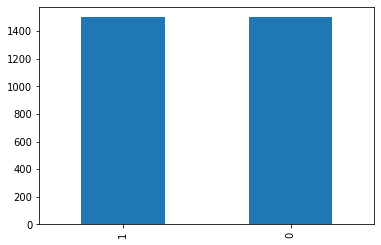

In [29]:
y_sm.value_counts().plot.bar()

## modelling

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=800
                             , min_samples_split=3
                             , min_samples_leaf=1
                             , max_features='sqrt'
                             , max_depth=90
                             , bootstrap='False')

In [31]:
clf.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap='False', max_depth=90, max_features='sqrt',
                       min_samples_split=3, n_estimators=800)

In [32]:
pickle.dump( clf, open( "save_model.p", "wb" ) )

In [33]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': 'False',
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 90,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Evaluation

In [34]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, clf.predict(X_test))

In [35]:
clf = pickle.load( open( "save_model.p", "rb" ) )

In [36]:
actual = y_test

prob_1 = clf.predict_proba(X_test)[:,1]

evaluate = pd.DataFrame({"actual": actual
                        , "prob_1": prob_1
                        })
threshold = 0.5

evaluate["predictions"] = (evaluate["prob_1"] > threshold) *1

print((evaluate["actual"]==evaluate["predictions"]).mean())
#evaluate

0.9696969696969697


In [202]:
evaluate.to_csv('evaluation.csv', index = True, header=True)

In [37]:
#incorrect predictions
errors = evaluate[evaluate['actual']!=evaluate['predictions']]
errors

,actual,prob_1,predictions
p14_event_record,,,
40864565,1,0.220875,0
40792853,0,0.542753,1
40599562,1,0.320146,0
40557897,0,0.542211,1
40621658,0,0.868958,1
40572110,1,0.495836,0
40723087,1,0.097542,0
40579633,1,0.494167,0
40575998,0,0.776146,1


In [38]:
#errors.to_csv('errors.csv', index = True, header=True)

### probability/ distribution plot

[]

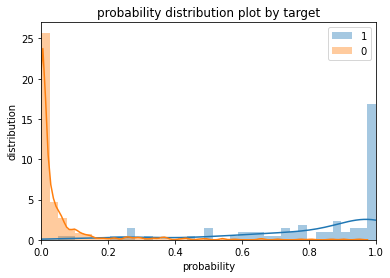

In [39]:
#import seaborn as sns
#import matplotlib.pyplot as plt

x = evaluate[evaluate['actual']==1].prob_1
y = evaluate[evaluate['actual']==0].prob_1

bins = np.linspace(0,1,40)

sns.distplot(x, bins=bins, label='1')
sns.distplot(y, bins=bins, label='0')
plt.xlim(0,1)
plt.xlabel('probability')
plt.ylabel('distribution')
plt.title('probability distribution plot by target')
plt.legend()
plt.plot()

### Classification report

In [40]:
from sklearn.metrics import classification_report

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
#print("Accuracy: {}".format(cv.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       643
           1       0.87      0.87      0.87        83

    accuracy                           0.97       726
   macro avg       0.93      0.93      0.93       726
weighted avg       0.97      0.97      0.97       726



**interpretaion**
- Recall – What percent of the positive cases did you catch? 
- Precision – What percent of your predictions were correct?
- F1 score – What percent of positive predictions were correct? 
    - the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset

### confusion matrix

cm = pd.crosstab(
    evaluate["actual"]
    , evaluate["predictions"]
    , rownames = ["Actual"]
    , colnames = ["Prediction"]
    , margins = True
)
cm

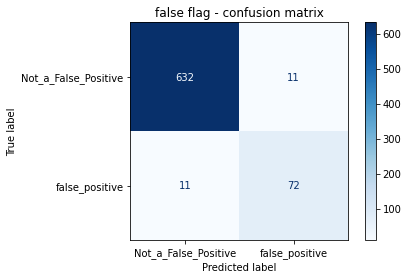

In [41]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test,y_test, cmap=plt.cm.Blues,display_labels=dict(Not_a_False_Positive=0,false_positive=1))
disp.ax_.set_title("false flag - confusion matrix")
plt.show()

### ROC curve

In [42]:
# Import necessary modules
from sklearn.metrics import auc, roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(evaluate["actual"] , evaluate["predictions"])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9251812850156458


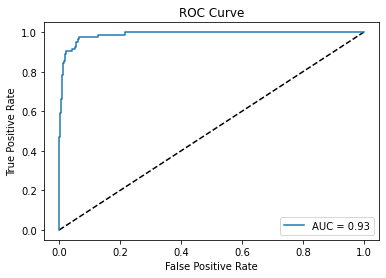

In [43]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Precision recall curve

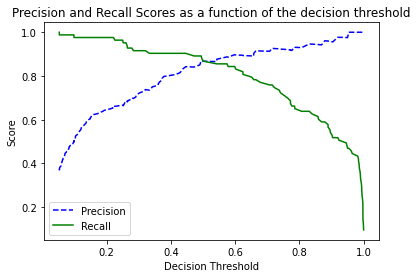

In [44]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_test, y_pred_prob)
#plt.figure(figsize=(8, 8))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, p[:-1], "b--", label="Precision")
plt.plot(thresholds, r[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

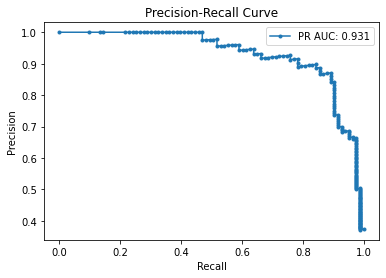

In [45]:
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_score = auc(recall, precision)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='PR AUC: %.3f' % auc_score)
# axis labels
plt.title("Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## feature importance

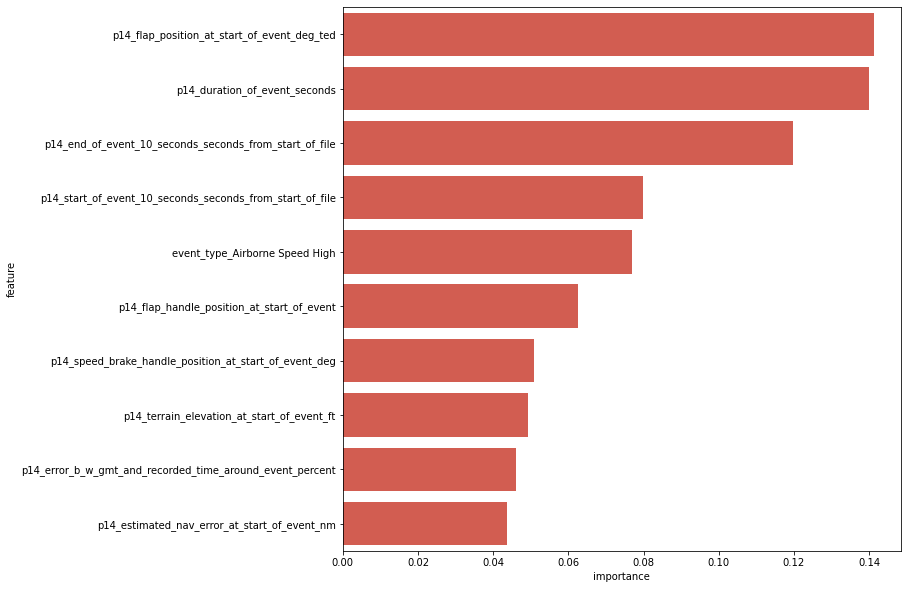

,feature,importance,cum_sum
0,p14_flap_position_at_start_of_event_deg_ted,0.141364,0.141364
1,p14_duration_of_event_seconds,0.139922,0.281286
2,p14_end_of_event_10_seconds_seconds_from_start...,0.119823,0.401109
3,p14_start_of_event_10_seconds_seconds_from_sta...,0.079978,0.481087
4,event_type_Airborne Speed High,0.076818,0.557905
5,p14_flap_handle_position_at_start_of_event,0.062668,0.620573
6,p14_speed_brake_handle_position_at_start_of_ev...,0.050824,0.671397
7,p14_terrain_elevation_at_start_of_event_ft,0.049235,0.720632
8,p14_error_b_w_gmt_and_recorded_time_around_eve...,0.046039,0.766671
9,p14_estimated_nav_error_at_start_of_event_nm,0.043732,0.810403


Original number of columns: 21


In [46]:
n_records = 10

importances = pd.DataFrame({
    "feature": X_train.columns.tolist(),
    "importance": clf.feature_importances_
})
importances = importances.sort_values("importance", ascending=False).reset_index(drop=True)
importances["cum_sum"] = np.cumsum(importances.importance)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(importances[:n_records].importance, importances[:n_records].feature, color='#E74C3C')

plt.show()

display(importances[:n_records])
print(f"Original number of columns: {len(features)}")

## Create the explainer

In [53]:
import lime
import lime.lime_tabular

In [54]:
def ref_number(event_num):
    for i, x in enumerate(y_test.index):
        if event_num == x:
            #print (i)
            return i

In [55]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train
                                                   , feature_names= X_train.columns.tolist()
                                                   , class_names= target
                                                   , mode='regression'
                                                   , discretize_continuous=False
                                                   )

In [203]:
#iterate and create a dataframe of features to explain all predictions
l = []

for event_no in evaluate.index:
    i = ref_number(event_no)
    exp = explainer.explain_instance(np.array(X_test)[i], clf.predict_proba, num_features=7)
    a = pd.DataFrame(exp.as_list(label=1), columns=['Feature', 'Value'])
    a['p14_event_record'] = event_no
    l.append(a)

df= []

for event in range(0,len(l)-1):
    a = l[event].values.tolist()
    for i in a:
        df.append(i)

features = pd.DataFrame(df, columns = ['Feature', 'Value', 'p14_event_record']).set_index('p14_event_record')

features.to_csv('features.csv', index = True, header=True)

In [56]:
errors

,actual,prob_1,predictions
p14_event_record,,,
40864565,1,0.220875,0
40792853,0,0.542753,1
40599562,1,0.320146,0
40557897,0,0.542211,1
40621658,0,0.868958,1
40572110,1,0.495836,0
40723087,1,0.097542,0
40579633,1,0.494167,0
40575998,0,0.776146,1


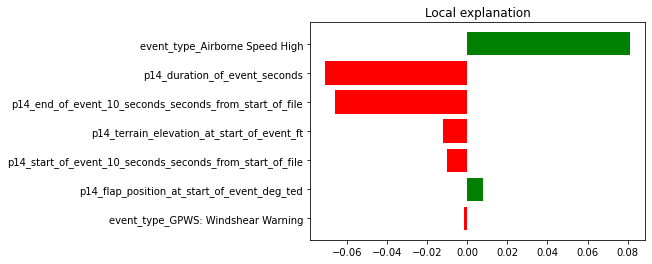

,Feature,Value
0,event_type_Airborne Speed High,0.081042
1,p14_duration_of_event_seconds,-0.070755
2,p14_end_of_event_10_seconds_seconds_from_start...,-0.066208
3,p14_terrain_elevation_at_start_of_event_ft,-0.011988
4,p14_start_of_event_10_seconds_seconds_from_sta...,-0.009952
5,p14_flap_position_at_start_of_event_deg_ted,0.007867
6,event_type_GPWS: Windshear Warning,-0.001675


In [205]:
ref = 40561679

i = ref_number(ref)
exp = explainer.explain_instance(np.array(X_test)[i], clf.predict_proba, num_features=7)

#exp.show_in_notebook(show_table=True, show_all=False)
exp.as_pyplot_figure()
plt.show()

table = pd.DataFrame(exp.as_list(label=1), columns=['Feature', 'Value'])
table

In [206]:
exp.show_in_notebook(show_table=True, show_all=True)

In [59]:
df1.reset_index(drop=False, inplace=True)
errors.reset_index(drop=False, inplace=True)

In [60]:
summary = errors.merge(df1, on='p14_event_record', how='left', indicator=True).drop(columns=['airframe','fleet','takeoff_airport_code','landing_airport_code','target','flight_record','_merge'])

#summary[summary['p14_event_record']==ref]

summary

,p14_event_record,actual,prob_1,predictions,flight_date_exact,tail_number,p14_event_type,p14_severity,p14_false_positive,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_duration_of_event_seconds,p14_terrain_elevation_at_start_of_event_ft,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,p14_speed_brake_handle_position_at_start_of_event_deg,p14_flap_position_at_start_of_event_deg_ted
0,40864565,1,0.204292,0,11/03/2020 5:53,VH-VZB,Airspeed Low Relative to Stall Speed,Level 2,Bad Parameter: Bad Sensor on Airplane,5052.0,5080.0,8.0,23.689848,4.0,0.000799,0.003722,0,40.0,3.837064,40.000000
1,40792853,0,0.501979,1,2/01/2019 23:33,VH-VXH,TCAS Resolution Advisory,Level 2,Not a False Positive,5776.0,6059.0,263.0,927.821545,0.0,-0.000021,0.007424,0,0.0,-1.102259,0.000000
2,40599562,1,0.326333,0,10/11/2019 8:52,VH-VZT,Speed Brakes Used During Final Approach,Level 3,Bad Parameter: Cause Unknown,9922.0,9942.0,0.0,1.991812,0.0,0.001335,0.012107,0,30.0,4.745699,29.980498
3,40557897,0,0.512542,1,28/12/2019 22:14,VH-VXP,TCAS Resolution Advisory,Level 2,Not a False Positive,4419.0,4726.0,287.0,774.934375,0.0,0.000555,0.002464,0,0.0,-1.010284,0.009502
4,40621658,0,0.869875,1,13/10/2019 3:10,VH-VYK,Late Land Flap Selection,Level 2,Not a False Positive,4458.0,4478.0,0.0,119.236084,12.0,0.001335,0.004142,0,40.0,1.557238,24.921926
5,40572110,1,0.460583,0,11/12/2019 6:22,VH-VZQ,Pitch Attitude High During Rotation (Gears Ext...,Level 3,Bad Parameter: Short-term Data Dropout,463.0,483.0,0.0,1720.516968,0.0,23.332977,0.667207,0,1.0,-1.102259,1.021435
6,40723087,1,0.121354,0,30/05/2019 23:53,VH-VYE,Rotation Speed High,Level 2,Bad Parameter: Bad Sensor on Airplane,445.0,465.0,0.0,12.144091,3.0,-0.001526,0.029943,0,1.0,-1.194254,1.012421
7,40579633,1,0.495104,0,3/12/2019 7:48,VH-VZG,GPWS: Don't Sink,Level 2,Bad Parameter: Bad Sensor on Airplane,13321.0,13352.0,11.0,3433.659912,2.0,0.001270,0.011441,0,1.0,33.484390,1.007913
8,40575998,0,0.793312,1,6/12/2019 23:09,VH-VZZ,GPWS: Too Low Terrain,Level 2,Not a False Positive,9776.0,9797.0,1.0,1189.332031,0.0,0.000200,0.000719,0,15.0,3.564107,15.234418
9,40700521,1,0.289708,0,4/07/2019 5:10,VH-VYI,Speed Brakes Used During Final Approach,Level 3,Bad Parameter: Cause Unknown,4475.0,4495.0,0.0,18.737251,2.0,-0.000095,0.005850,0,30.0,4.745699,30.253965


In [61]:
#summary.to_csv('errors.csv', index = True, header=True)

In [62]:
summary.groupby(['p14_event_type','p14_false_positive']).count()


p14_event_record  \
p14_event_type                                     p14_false_positive                                         
Airspeed Low Relative to Stall Speed               Bad Parameter: Bad Sensor on Airplane                  1   
Approach Speed High Below 50 ft AGL (Vref)         Bad Parameter: Bad Sensor on Airplane                  1   
Deep Touchdown                                     Bad Parameter: Short-term Data Dropout                 1   
GPWS: Don't Sink                                   Bad Parameter: Bad Sensor on Airplane                  1   
GPWS: Too Low Gear                                 Bad Parameter: Bad Sensor on Airplane                  1   
GPWS: Too Low Terrain                              Not a False Positive                                   1   
High Speed Below 3000 ft AAL                       Not a False Positive                                   1   
Late Land Flap Selection                           Bad Parameter: Bad Sensor on Airplane                  1   
                                                   Not a False Positive                                   5   
Pitch Attitude High During Rotation (Gears Exte... Bad Parameter: Short-term Data Dropout                 1   
                                                   Not a False Positive                                   1   
Pitch Rate Low during Rotation                     Not a False Positive                                   1   
Rotation Speed High                                Bad Parameter: Bad Sensor on Airplane                  1   
Speed Brakes Used During Final Approach            Bad Parameter: Bad Sensor on Airplane                  2   
                                                   Bad Parameter: Cause Unknown                           2   
Stick shaker                                       Not a False Positive                                   2   
TCAS Resolution Advisory                           Not a False Positive                                   2   

                                                                                           actual  \
p14_event_type                                     p14_false_positive                               
Airspeed Low Relative to Stall Speed               Bad Parameter: Bad Sensor on Airplane        1   
Approach Speed High Below 50 ft AGL (Vref)         Bad Parameter: Bad Sensor on Airplane        1   
Deep Touchdown                                     Bad Parameter: Short-term Data Dropout       1   
GPWS: Don't Sink                                   Bad Parameter: Bad Sensor on Airplane        1   
GPWS: Too Low Gear                                 Bad Parameter: Bad Sensor on Airplane        1   
GPWS: Too Low Terrain                              Not a False Positive                         1   
High Speed Below 3000 ft AAL                       Not a False Positive                         1   
Late Land Flap Selection                           Bad Parameter: Bad Sensor on Airplane        1   
                                                   Not a False Positive                         5   
Pitch Attitude High During Rotation (Gears Exte... Bad Parameter: Short-term Data Dropout       1   
                                                   Not a False Positive                         1   
Pitch Rate Low during Rotation                     Not a False Positive                         1   
Rotation Speed High                                Bad Parameter: Bad Sensor on Airplane        1   
Speed Brakes Used During Final Approach            Bad Parameter: Bad Sensor on Airplane        2   
                                                   Bad Parameter: Cause Unknown                 2   
Stick shaker                                       Not a False Positive                         2   
TCAS Resolution Advisory                           Not a False Positive                         2   

                                                             

## EDA

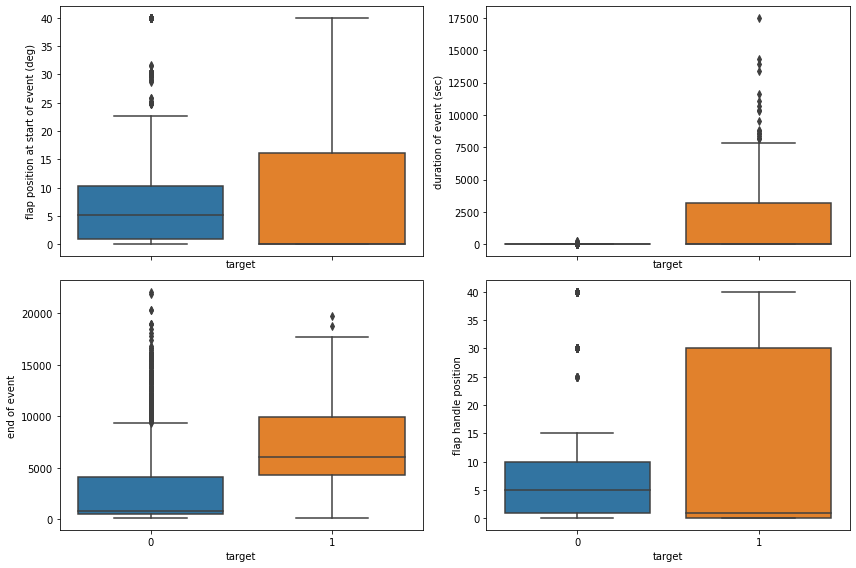

In [47]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
ax1 = sns.boxplot(x='target', y='p14_flap_position_at_start_of_event_deg_ted', data=df1, ax=axes[0, 0])
ax1.set(ylabel='flap position at start of event (deg)')
ax2 = sns.boxplot(x='target', y='p14_duration_of_event_seconds', data=df1, ax=axes[0, 1])
ax2.set(ylabel='duration of event (sec)')
ax3 = sns.boxplot(x='target', y='p14_end_of_event_10_seconds_seconds_from_start_of_file', data=df1, ax=axes[1, 0])
ax3.set(ylabel='end of event')
ax4 = sns.boxplot(x='target', y='p14_flap_handle_position_at_start_of_event', data=df1, ax=axes[1, 1])
ax4.set(ylabel='flap handle position')
#plt.yticks()
#plt.setp(axes)
plt.tight_layout()

sns.boxplot(x='target', y='p14_flap_position_at_start_of_event_deg_ted', data=df1)
plt.title('flap position')
plt.ylabel('flap postion at start of event')
plt.xlabel('target')

Text(0.5, 1.0, 'flap position')

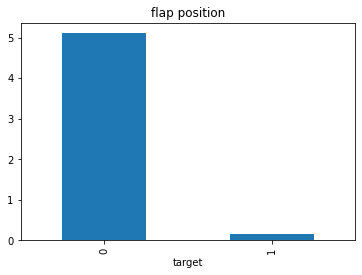

In [48]:
df1.groupby(['target'])['p14_flap_position_at_start_of_event_deg_ted'].median().plot.bar()
plt.title('flap position')

sns.boxplot(x='target', y='p14_duration_of_event_seconds', data=df1)
plt.title('duration of event')

<AxesSubplot:xlabel='target'>

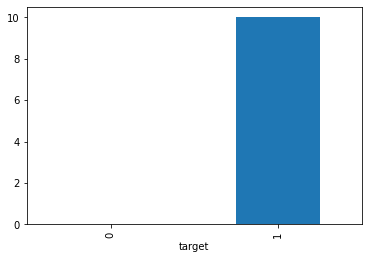

In [49]:
df1.groupby(['target'])['p14_duration_of_event_seconds'].median().plot.bar()

sns.boxplot(x='target', y='p14_end_of_event_10_seconds_seconds_from_start_of_file', data=df1)


<AxesSubplot:xlabel='target'>

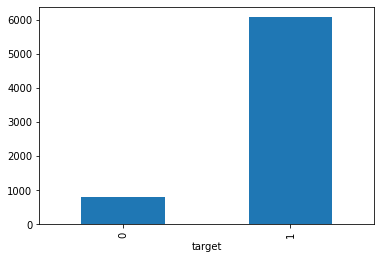

In [50]:
df1.groupby(['target'])['p14_end_of_event_10_seconds_seconds_from_start_of_file'].median().plot.bar()

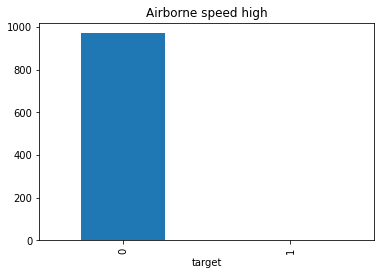

target
0    971
1      1
Name: flight_record, dtype: int64


In [51]:
df1[df1['p14_event_type']=="Airborne Speed High"].groupby('target')['flight_record'].count().plot.bar()
plt.title('Airborne speed high')
plt.show()

print(df1[df1['p14_event_type']=="Airborne Speed High"].groupby('target')['flight_record'].count())

sns.boxplot(x='target', y='p14_flap_handle_position_at_start_of_event', data=df1)
plt.title('flap handle position')

sns.boxplot(x='target', y='p14_speed_brake_handle_position_at_start_of_event_deg', data=df1, showfliers=False)
plt.title("note outliers have been excluded")
#df1.groupby(['target'])['p14_speed_brake_handle_position_at_start_of_event_deg'].median().plot.bar()

target
0    186
1      2
Name: flight_record, dtype: int64


Text(0.5, 1.0, 'Rotation Speed High')

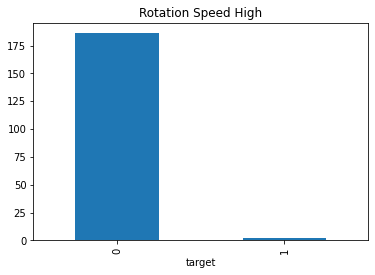

In [52]:
df1[df1['p14_event_type']=="Rotation Speed High"].groupby('target')['flight_record'].count().plot.bar()
print(df1[df1['p14_event_type']=="Rotation Speed High"].groupby('target')['flight_record'].count())
plt.title('Rotation Speed High')